<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# Ploting Data in Qiskit
**NOTE THIS ONLY WORKS WITH QISKIT 0.7**

To use this notebook you need to ensure that you have [maptlotlib](https://matplotlib.org/) installed on your system

In [1]:
from qiskit.tools.visualization import plot_histogram, plot_state, plot_bloch_vector

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer

## Plot histogram

To visualize the data from a quantum circuit run on a real device or `qasm_simulator` we have made a simple function 

`plot_histogram(data)`

As an example we make a 2 qubit Bell state

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

# quantum circuit to make a Bell state 
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])

meas = QuantumCircuit(q,c)
meas.measure(q, c)

# execute the quantum circuit 
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = bell+meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 483, '00': 517}


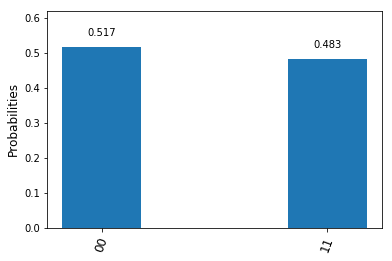

In [4]:
plot_histogram(counts)

### Output modes for plot_histogram()

There are two output types for the plot_histogram() function, an interactive plot made using an externally hosted JS library for use in Jupyter notebooks, and a locally run plot made using matplotlib. By default the interactive plot will be run if you're running inside a jupyter notebook and only if you have external connectivity to the host with the JS library. But you can use the `mode` kwarg to select explicitly which mode to use. You can set it to either `'interactive'` or `'mpl'` to select either interactive or matplotlib respectively. It's also worth noting that if you set it to `interactive` outside of a jupyter notebook it will fail.

In [5]:
# Run in interactive mode
plot_histogram(counts, mode='interactive')

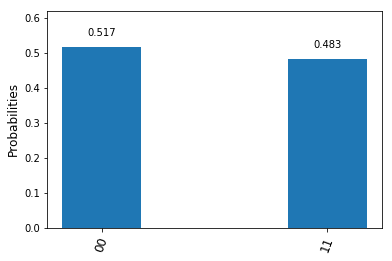

In [6]:
# Run in mpl mode
plot_histogram(counts, mode='mpl')

### Options when plotting a histogram

The `plot_histogram()` has a couple of options to adjust the output graph. The first option is the `legend` kwarg. This is used to provide a label for the executions. It takes a list of strings use to label each execution's results. This is mostly useful when plotting multiple execution results in the same histogram. The other option is the `options` kwarg, this takes in a dict of various options to adjust the output figure being rendered. These options are shared between both output modes (except where noted) The valid keys are:

- **width** (integer): graph horizontal size, must be specified with
  height to have an effect
- **height** (integer): graph vertical size, must be specified with
  width to have an effect
- **number_to_keep** (integer): the number of terms to show, the rest are grouped together in a single bar called rest
- **show_legend** (bool): show legend of graph content
- **sort** (string): Could be 'asc' or 'desc'
- **slider** (bool): activate slider (`interactive` mode only)

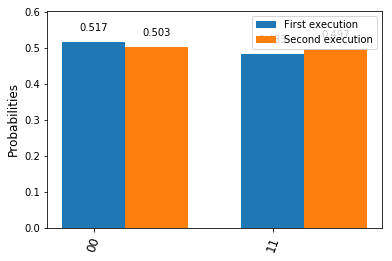

In [7]:
# Execute 2 qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

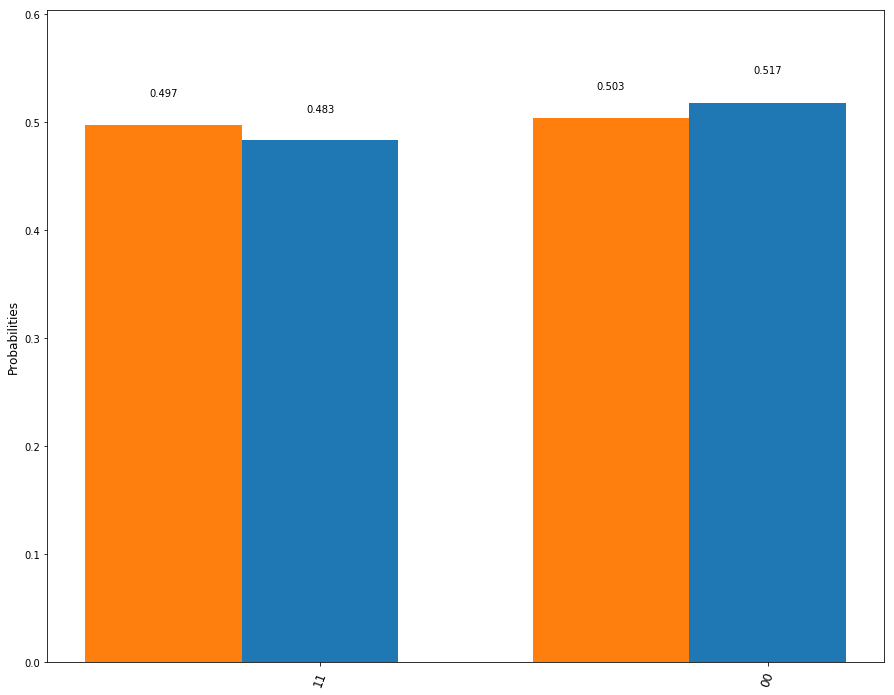

In [8]:
options = {'show_legend': False, 'sort': 'desc', 'show_legend': False, 'width': 15, 'height': 12}
plot_histogram([counts, second_counts], legend=legend, options=options)

### Adjusting the output from plot_histogram()

When using the `mpl` mode by default the plot_histogram() function returns a matplotlib.Figure for the rendred visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, there are options on the plot_histogram() function to control the output. First you can use the `filename` kwarg to pass a path to save an image file when running the function. Or alternatively, if you're running outside of jupyter you can set the `show` kwarg to True and it will open the rendered image up in a new window (`filename` takes precendence over `show`). In both cases the figure is still returned.

The `interactive` mode doesn't have a return and is always rendered directly in the jupyter notebook.

## Plot State

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. The function is

`
plot_state(quantum_state, method='city', filename=None)
`

A quantum state is either a state matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The state matrix is related to the statevector by 

$$\rho = |\psi\rangle\langle \psi|.$$

And is more general as it can represent mixed states (positive sum of statevectors) 

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

The methods supported are:
- `'city'`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city
- `'qsphere'`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different `'qsphere'` for each component. 
- `'paulivec'`: The representation of the state matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$
- `'hinton'`: Same as `'city'` but with the size of the element represent the vaule of the matrix element.  
- `'bloch'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.  

In [9]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

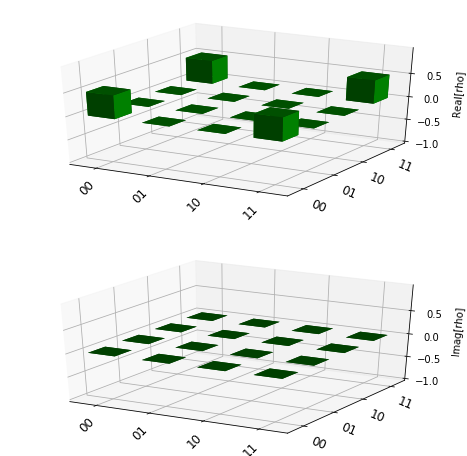

In [10]:
plot_state(psi, method='city')

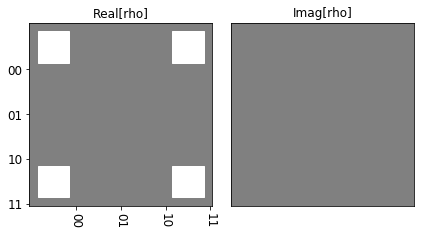

In [11]:
plot_state(psi, method='hinton')

The 0th eigenvalue = 1.0


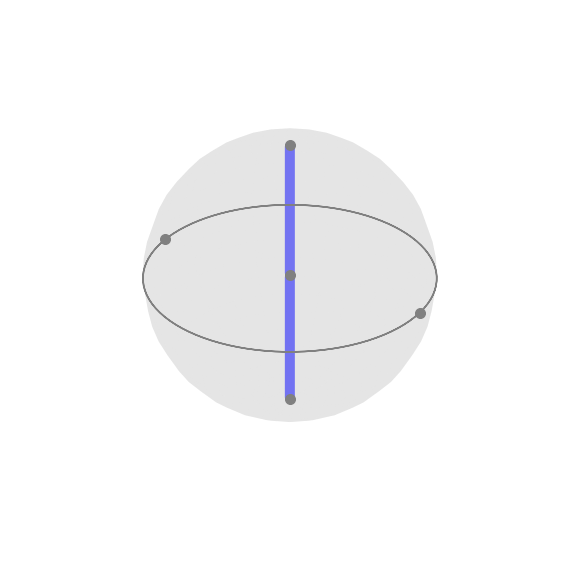

In [12]:
plot_state(psi, method='qsphere')

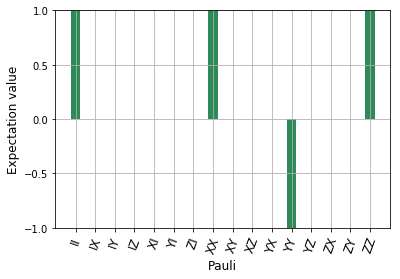

In [13]:
plot_state(psi, method='paulivec')

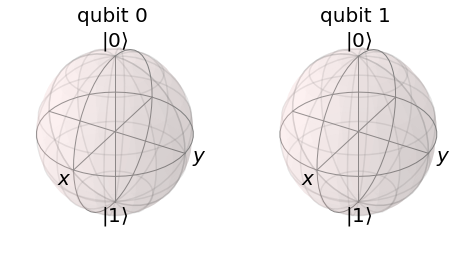

In [14]:
plot_state(psi, method='bloch')

Here we see that there is no information about the quantum state in the single qubit space as all vectors are zero. 

### Output modes for plot state

Just like with `plot_histogram()` there are two output types for the plot_histogram() function, an interactive plot made using an externally hosted JS library for use in Jupyter notebooks, and a locally run plot made using matplotlib. By default the interactive plot will be run if you're running inside a jupyter notebook and only if you have external connectivity to the host with the JS library. But you can use the `mode` kwarg to select explicitly which mode to use. You can set it to either `'interactive'` or `'mpl'` to select either interactive or matplotlib respectively. It's also worth noting that if you set it to `interactive` outside of a jupyter notebook it will fail. All the plot methods are supported on both output modes.

In [15]:
# Generate an interactive pauli vector plot
plot_state(psi, method='paulivec', mode='interactive')

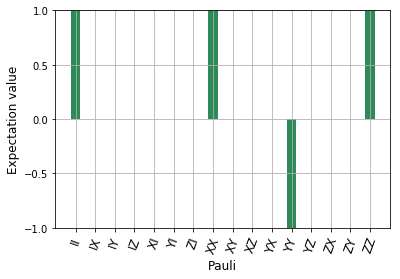

In [16]:
# Generate an mpl pauli vector plot
plot_state(psi, method='paulivec', mode='mpl')

### Options when using plot_state()

The `plot_state()` function has an `options` kwarg that enables adjusting how the plots are rendered. This takes in a dict of various options to adjust the output figure being rendered. This kwarg is only used when the output mode is `interactive`. The valid keys are:

- **width** (integer): graph horizontal size, must be specified with
  height to have an effect
- **height** (integer): graph vertical size, must be specified with
  width to have an effect
- **slider** (bool): activate slider

In [17]:
# Generate an interactive pauli vector plot
options = {'height': 800, 'width': 800, 'slider': True}
plot_state(psi, method='paulivec', options=options, mode='interactive')

### Adjusting the output from plot_state()

When using the `mpl` mode by default the plot_state() function returns a matplotlib.Figure for the rendred visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, there are options on the plot_state() function to control the output. First you can use the `filename` kwarg to pass a path to save an image file when running the function. Or alternatively, if you're running outside of jupyter you can set the `show` kwarg to True and it will open the rendered image up in a new window (`filename` takes precendence over `show`). In both cases the figure is still returned.

The `interactive` mode doesn't have a return and is always rendered directly in the jupyter notebook.

## Plot Bloch Vector

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as inputs the Bloch vector. 

The Bloch vecotr is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the state matrix.


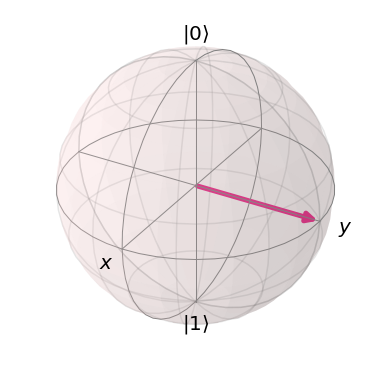

In [18]:
plot_bloch_vector([0,1,0])

### Adjusting the output from plot_bloch_vector()

When using the `mpl` mode by default the plot_bloch_vector() function returns a matplotlib.Figure for the rendred visualization. Jupyter notebooks understand this return type and renders it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, there are options on the plot_bloch_vector() function to control the output. First you can use the `filename` kwarg to pass a path to save an image file when running the function. Or alternatively, if you're running outside of jupyter you can set the `show` kwarg to True and it will open the rendered image up in a new window (`filename` takes precendence over `show`). In both cases the figure is still returned.